In [1]:
mutable struct StackmanModel
    
    # utility function 
    β::Float64
    γ::Float64

    # stochastic process
    μ::Float64
    σ::Float64
    
end

In [2]:
function StackmanModel(;μ = 0.2, γ = 2., σ = 0.36, β = 0.95)
    StackmanModel(β, γ, μ, σ)
end

StackmanModel

In [12]:
function initialize_state(m::StackmanModel; m_gird_length = 100, λ_gird_length = 80)
    OrderedDict(:m => linspace(-1., 2., m_gird_length), 
        :λ => linspace(0., 1., λ_gird_length))
end

function initialize_y(m::StackmanModel, state)
    OrderedDict(:v => fill(1.0, length(state[:m]), length(state[:λ])))
end

initialize_y (generic function with 1 method)

In [39]:
function (m::StackmanModel)(state, y)
    #unpack constants, state, current solution
    β = m.β; γ = m.γ; μ = m.μ; σ = m.σ
    m = state.m; λ = state.λ
    v = y.v; vm = y.vm; vmm = y.vmm; vλ = y.vλ; vλλ = y.vλλ; vmλ = y.vmλ

    # drift
    μm = λ * (μ - m)
    μλ = - λ^2

    # PDE
    #vt = (m + σ^2 / 2 * (1 - γ) 
    #    - β * v - vλ * λ^2
    #    + vm * λ * (μ - m + (1 - γ) * σ^2)
    #    + vm^2 * λ^2 * σ^2 / 2 * (1 - γ)
    #    + vmm * λ^2 * σ^2 / 2)
    
    vt = (m + σ^2 / 2 * (1 - γ) 
        - β * v - vλ * λ^2
        + vm * λ * (1 - γ) * σ^2
        + vm^2 * λ^2 * σ^2 / 2 * (1 - γ)
        + vmm * λ^2 * σ^2 / 2)


    return vt, (μm, μλ), tuple(:v => v, :μm => μm, :μλ => μλ)
end

In [40]:
using EconPDEs # install: Pkg.clone("https://github.com/matthieugomez/EconPDEs.jl")
m = StackmanModel()
state = initialize_state(m)
y0 = initialize_y(m, state);

In [41]:
y, result, distance = pdesolve(m, state, y0; iterations = 10)

(iter, Δ, distance) = (1, 1.0, 0.005866380452376963)
(iter, Δ, distance) = (2, 3.8687382163110087, 0.001274510241758817)
(iter, Δ, distance) = (3, 71.22889876886661, 1.8894136214135334e-5)
(iter, Δ, distance) = (4, 38438.15243470319, 5.249957321738804e-10)


(DataStructures.OrderedDict(:v=>[-1.12084 -1.12226 … -1.00609 -1.00484; -1.08894 -1.09075 … -1.0029 -1.00169; … ; 2.00515 2.00335 … 1.79419 1.79173; 2.03705 2.0349 … 1.7999 1.79739]), DataStructures.OrderedDict(:v=>[-1.12084 -1.12226 … -1.00609 -1.00484; -1.08894 -1.09075 … -1.0029 -1.00169; … ; 2.00515 2.00335 … 1.79419 1.79173; 2.03705 2.0349 … 1.7999 1.79739],:μm=>[0.0 0.0151899 … 1.18481 1.2; 0.0 0.0148063 … 1.15489 1.1697; … ; -0.0 -0.0224012 … -1.7473 -1.7697; -0.0 -0.0227848 … -1.77722 -1.8],:μλ=>[-0.0 -0.000160231 … -0.974844 -1.0; -0.0 -0.000160231 … -0.974844 -1.0; … ; -0.0 -0.000160231 … -0.974844 -1.0; -0.0 -0.000160231 … -0.974844 -1.0]), 5.249957321738804e-10)

In [42]:
result[:v]

100×80 Array{Float64,2}:
 -1.12084   -1.12226   -1.12287   …  -1.00734   -1.00609   -1.00484 
 -1.08894   -1.09075   -1.09246      -1.00411   -1.0029    -1.00169 
 -1.05705   -1.05885   -1.06063      -0.997887  -0.996738  -0.995593
 -1.02515   -1.02695   -1.02874      -0.988893  -0.987834  -0.986778
 -0.99325   -0.995056  -0.996839     -0.977346  -0.976398  -0.975451
 -0.961352  -0.963158  -0.964941  …  -0.963456  -0.962634  -0.961809
 -0.929454  -0.93126   -0.933043     -0.947425  -0.946739  -0.946048
 -0.897557  -0.899362  -0.901145     -0.929444  -0.928901  -0.92835 
 -0.865659  -0.867464  -0.869247     -0.909697  -0.9093    -0.908893
 -0.833761  -0.835566  -0.83735      -0.888357  -0.888106  -0.887844
 -0.801863  -0.803669  -0.805452  …  -0.865588  -0.865482  -0.865362
 -0.769965  -0.771771  -0.773554     -0.841544  -0.841577  -0.841597
 -0.738067  -0.739873  -0.741656     -0.816368  -0.816535  -0.816688
  ⋮                               ⋱                                 
  1.68618

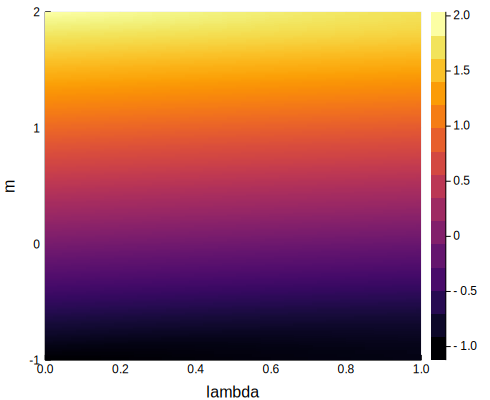

In [43]:
using Plots; gr()
contour(state[:λ], state[:m], result[:v], fill = true, size = (490, 400), xlab = "lambda", ylab = "m")

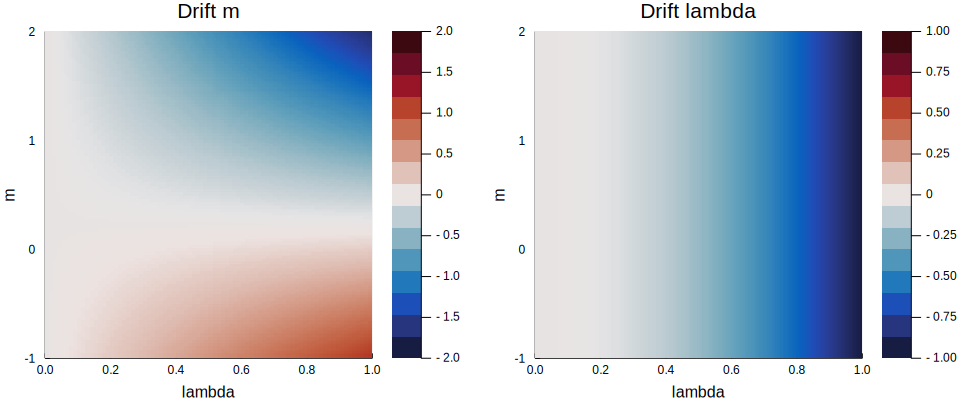

In [44]:
p1 = contour(state[:λ], state[:m], result[:μm], title = "Drift m", c = :balance, clim = (-2., 2.))
p2 = contour(state[:λ], state[:m], result[:μλ], title = "Drift lambda", c = :balance, clim = (-1., 1.))
plot(p1, p2, size=(980, 400), fill = true, xlab = "lambda", ylab = "m")

In [45]:
(m.μ + m.σ^2 / 2 * (1 - m.γ)) ./ m.β

0.14231578947368423

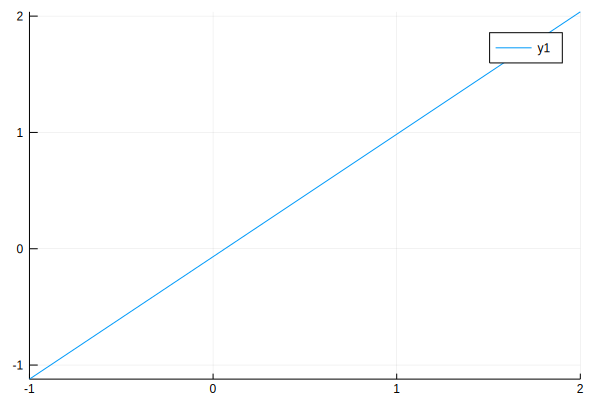

In [46]:
plot(state[:m], result[:v][:, 1])

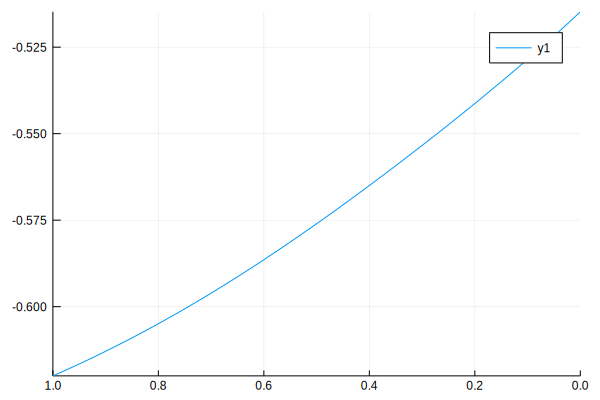

In [53]:
plot(state[:λ], result[:v][20, :], xflip = true)